# Introduction to

<img src="./julia_logo.png" align="center" width="400"/>

System information (for reproducibility)

In [1]:
versioninfo()

Julia Version 1.4.0
Commit b8e9a9ecc6 (2020-03-21 16:36 UTC)
Platform Info:
  OS: macOS (x86_64-apple-darwin18.6.0)
  CPU: Intel(R) Core(TM) i7-6920HQ CPU @ 2.90GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-8.0.1 (ORCJIT, skylake)
Environment:
  JULIA_EDITOR = code
  JULIA_NUM_THREADS = 4


## What's Julia?

> Julia is a high-level, high-performance dynamic programming language for technical computing, with syntax that is familiar to users of other technical computing environments

* History:
  - Project started in 2009. First public release in 2012 
  - Creators: Jeff Bezanson, Alan Edelman, Stefan Karpinski, Viral Shah
  - First major release v1.0 was released on Aug 8, 2018
  - Current stable release v1.1.0

* Aim to solve the notorious **two language problem**: Prototype code goes into high-level languages like R/Python, production code goes into low-level language like C/C++. 

    Julia aims to:
> Walks like Python. Runs like C.

<img src="./julia_vs_otherlang.png" align="center" width="600"/>

See <https://julialang.org/benchmarks/> for the details of benchmark.

* Write high-level, abstract code that closely resembles mathematical formulas
    - yet produces fast, low-level machine code that has traditionally only been generated by static languages.

* Julia is more than just "Fast R" or "Fast Matlab"
    - Performance comes from features that work well together.  
    - You can't just take the magic dust that makes Julia fast and sprinkle it on [language of choice]

## Learning resources

1. The (free) online course [Introduction to Julia](https://juliaacademy.com/p/intro-to-julia), by Jane Herriman. 

2. Cheat sheet: [The Fast Track to Julia](https://juliadocs.github.io/Julia-Cheat-Sheet/).  

3. Browse the Julia [documentation](https://docs.julialang.org/en).  

4. For Matlab users, read [Noteworthy Differences From Matlab](https://docs.julialang.org/en/v1/manual/noteworthy-differences/#Noteworthy-differences-from-MATLAB-1).  

    For R users, read [Noteworthy Differences From R](https://docs.julialang.org/en/v1/manual/noteworthy-differences/#Noteworthy-differences-from-R-1).  

    For Python users, read [Noteworthy Differences From Python](https://docs.julialang.org/en/v1/manual/noteworthy-differences/?highlight=matlab#Noteworthy-differences-from-Python-1).  

5. The [Learning page](http://julialang.org/learning/) on Julia's website has pointers to many other learning resources.  

## Julia REPL (Read-Evaluation-Print-Loop)

The `Julia` REPL, or `Julia` shell, has at least five modes.

1. **Default mode** is the Julian prompt `julia>`. Type backspace in other modes to enter default mode.    

2. **Help mode** `help?>`. Type `?` to enter help mode. `?search_term` does a fuzzy search for `search_term`.  

3. **Shell mode** `shell>`. Type `;` to enter shell mode.  

4. **Package mode** `(@v1.4) pkg>`. Type `]` to enter package mode for managing Julia packages (install, uninstall, update, ...).

5. **Search mode** `(reverse-i-search)`. Press `ctrl+R` to enter search model. 

6. With `RCall.jl` package installed, we can enter the **R mode** by typing `$` (shift+4) at Julia REPL.

Some survival commands in Julia REPL:  
1. `quit()` or `Ctrl+D`: exit Julia.

2. `Ctrl+C`: interrupt execution.

3. `Ctrl+L`: clear screen.

0. Append `;` (semi-colon) to suppress displaying output from a command. Same as Matlab.

0. `include("filename.jl")` to source a Julia code file.

## Seek help

* Online help from REPL: `?function_name`.

* Google (of course).

* Julia documentation: <https://docs.julialang.org/en/>.

* Look up source code: `@edit sin(π)`.

* Discourse: <https://discourse.julialang.org>.

* Friends.

## Which IDE?

* Julia homepage lists many choices: Juno, VS Code, Vim, ...

* Unfortunately at the moment there are no mature RStudio- or Matlab-like IDE for Julia yet.

* For dynamic document, e.g., homework, I recommend [Jupyter Notebook](https://jupyter.org/install.html) or [JupyterLab](http://jupyterlab.readthedocs.io/en/stable/). 

* For extensive Julia coding, myself has been happily using the editor [VS Code](https://code.visualstudio.com) with extensions `Julia` and `VS Code Jupyter Notebook Previewer` installed. 

## Julia package system

* Each Julia package is a Git repository. Each Julia package name ends with `.jl`. E.g., `Distributions.jl` package lives at <https://github.com/JuliaStats/Distributions.jl>.   
Google search with `PackageName.jl` usually leads to the package on github.com. 

* The package ecosystem is rapidly maturing; a complete list of **registered** packages (which are required to have a certain level of testing and documentation) is at [http://pkg.julialang.org/](http://pkg.julialang.org/).

* For example, the package called `Distributions.jl` is added with
```julia
# in Pkg mode
(@v1.4) pkg> add Distributions
```
and "removed" (although not completely deleted) with
```julia
# in Pkg mode
(@v1.4) pkg> rm Distributions
```
* The package manager provides a dependency solver that determines which packages are actually required to be installed.

* **Non-registered** packages are added by cloning the relevant Git repository. E.g.,
```julia
# in Pkg mode
(@v1.4) pkg> add https://github.com/OpenMendel/SnpArrays.jl
```

* A package needs only be added once, at which point it is downloaded into your local `.julia/packages` directory in your home directory. 

In [2]:
readdir(Sys.islinux() ? ENV["JULIA_PATH"] * "/pkg/packages" : ENV["HOME"] * "/.julia/packages")

411-element Array{String,1}:
 ".DS_Store"
 "AMD"
 "AbstractFFTs"
 "AbstractMCMC"
 "AbstractTrees"
 "AccurateArithmetic"
 "Adapt"
 "AlgebraicMultigrid"
 "AlgorithmsFromTheBook"
 "ArgCheck"
 "ArnoldiMethod"
 "Arpack"
 "Arpack_jll"
 ⋮
 "ZMQ"
 "ZeroMQ_jll"
 "ZipFile"
 "Zlib_jll"
 "Zstd_jll"
 "Zygote"
 "ZygoteRules"
 "libass_jll"
 "libfdk_aac_jll"
 "libvorbis_jll"
 "x264_jll"
 "x265_jll"

* Directory of a specific package can be queried by `pathof()`:

In [3]:
using Distributions

pathof(Distributions)

"/Users/huazhou/.julia/packages/Distributions/dTXqn/src/Distributions.jl"

* If you start having problems with packages that seem to be unsolvable, you may try just deleting your .julia directory and reinstalling all your packages. 

* Periodically, one should run `update` in Pkg mode, which checks for, downloads and installs updated versions of all the packages you currently have installed.

* `status` lists the status of all installed packages.

* Using functions in package.
```julia
using Distributions
```
This pulls all of the *exported* functions in the module into your local namespace, as you can check using the `whos()` command. An alternative is
```julia
import Distributions
```
Now, the functions from the Distributions package are available only using 
```julia
Distributions.<FUNNAME>
```
All functions, not only exported functions, are always available like this.

## Calling R from Julia

* The [`RCall.jl`](https://github.com/JuliaInterop/RCall.jl) package allows us to embed R code inside of Julia.

* There are also `PyCall.jl`, `MATLAB.jl`, `JavaCall.jl`, `CxxWrap.jl` packages for interfacing with other languages.

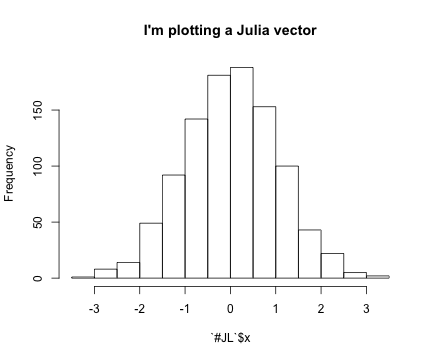

RObject{VecSxp}
$breaks
 [1] -3.5 -3.0 -2.5 -2.0 -1.5 -1.0 -0.5  0.0  0.5  1.0  1.5  2.0  2.5  3.0  3.5

$counts
 [1]   1   8  14  49  92 142 181 188 153 100  43  22   5   2

$density
 [1] 0.002 0.016 0.028 0.098 0.184 0.284 0.362 0.376 0.306 0.200 0.086 0.044
[13] 0.010 0.004

$mids
 [1] -3.25 -2.75 -2.25 -1.75 -1.25 -0.75 -0.25  0.25  0.75  1.25  1.75  2.25
[13]  2.75  3.25

$xname
[1] "`#JL`$x"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"


In [4]:
using RCall

x = randn(1000)
R"""
hist($x, main="I'm plotting a Julia vector")
"""

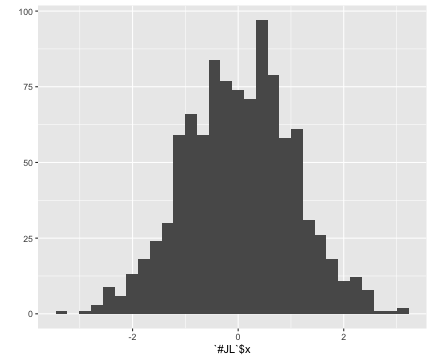

RObject{VecSxp}


┌ Warning: RCall.jl: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
└ @ RCall /Users/huazhou/.julia/packages/RCall/g7dhB/src/io.jl:113


In [5]:
R"""
library(ggplot2)
qplot($x)
"""

In [6]:
x = R"""
rnorm(10)
"""

RObject{RealSxp}
 [1] -0.7434795 -0.1407422  0.3240563 -0.2724880  0.1834707 -1.1088236
 [7]  0.5572168 -0.1895255  0.1130932 -0.2818700


In [7]:
# collect R variable into Julia workspace
y = collect(x)

10-element Array{Float64,1}:
 -0.7434794964976497
 -0.14074223858643622
  0.32405626602623255
 -0.2724879623151959
  0.1834706672011216
 -1.1088235553604642
  0.5572167886258536
 -0.1895254695387103
  0.11309321437369145
 -0.2818699901231905

* Access Julia variables in R REPL mode:
```julia
julia> x = rand(5) # Julia variable
R> y <- $x
```

* Pass Julia expression in R REPL mode:
```julia
R> y <- $(rand(5))
```

* Put Julia variable into R environment:
```julia
julia> @rput x
R> x
```

* Get R variable into Julia environment:
```julia
R> r <- 2
Julia> @rget r
```

* If you want to call Julia within R, check out the [`XRJulia`](https://cran.r-project.org/web/packages/XRJulia/) package by John Chambers.

## Some basic Julia code

In [8]:
# an integer, same as int in R
y = 1
typeof(y) 

Int64

In [9]:
# a Float64 number, same as double in R
y = 1.0
typeof(y) 

Float64

In [10]:
# Greek letters:  `\pi<tab>`
π

π = 3.1415926535897...

In [11]:
typeof(π)

Irrational{:π}

In [12]:
# Greek letters:  `\theta<tab>`
θ = y + π

4.141592653589793

In [13]:
# emoji! `\:kissing_cat:<tab>`
😽 = 5.0

5.0

In [14]:
# `\alpha<tab>\hat<tab>`
α̂ = π

π = 3.1415926535897...

In [15]:
# vector of Float64 0s
x = zeros(5)

5-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0

In [16]:
# vector Int64 0s
x = zeros(Int, 5)

5-element Array{Int64,1}:
 0
 0
 0
 0
 0

In [17]:
# matrix of Float64 0s
x = zeros(5, 3)

5×3 Array{Float64,2}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [18]:
# matrix of Float64 1s
x = ones(5, 3)

5×3 Array{Float64,2}:
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0

In [19]:
# define array without initialization
x = Matrix{Float64}(undef, 5, 3)

5×3 Array{Float64,2}:
 5.0e-324      5.0e-324  0.0
 6.0e-323      0.0       0.0
 1.0e-323      0.0       0.0
 2.51987e-314  0.0       0.0
 0.0           0.0       0.0

In [20]:
# fill a matrix by 0s
fill!(x, 0)

5×3 Array{Float64,2}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [21]:
# initialize an array to be constant 2.5
fill(2.5, (5, 3))

5×3 Array{Float64,2}:
 2.5  2.5  2.5
 2.5  2.5  2.5
 2.5  2.5  2.5
 2.5  2.5  2.5
 2.5  2.5  2.5

In [22]:
# rational number
a = 3//5

3//5

In [23]:
typeof(a)

Rational{Int64}

In [24]:
b = 3//7

3//7

In [25]:
a + b

36//35

In [26]:
# uniform [0, 1) random numbers
x = rand(5, 3)

5×3 Array{Float64,2}:
 0.712998  0.7241    0.757813
 0.10047   0.519541  0.195903
 0.527667  0.280008  0.0199617
 0.216533  0.117803  0.682388
 0.856477  0.809259  0.0408994

In [27]:
# uniform random numbers (in single precision)
x = rand(Float16, 5, 3)

5×3 Array{Float16,2}:
 0.03027  0.1465  0.3955
 0.29     0.838   0.826
 0.908    0.0674  0.4053
 0.05078  0.3906  0.4668
 0.58     0.3545  0.4404

In [28]:
# random numbers from {1,...,5}
x = rand(1:5, 5, 3)

5×3 Array{Int64,2}:
 1  1  4
 5  2  1
 1  4  4
 4  2  4
 3  2  3

In [29]:
# standard normal random numbers
x = randn(5, 3)

5×3 Array{Float64,2}:
 -0.622241  -1.11224     2.08472
 -0.185452  -0.233391   -1.03303
 -0.447617   0.0482106   0.349676
 -0.306244   1.37201    -1.07803
  0.230082  -2.5914     -0.145619

In [30]:
# range
1:10

1:10

In [31]:
typeof(1:10)

UnitRange{Int64}

In [32]:
1:2:10

1:2:9

In [33]:
typeof(1:2:10)

StepRange{Int64,Int64}

In [34]:
# integers 1-10
x = collect(1:10)

10-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [35]:
# or equivalently
[1:10...]

10-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [36]:
# Float64 numbers 1-10
x = collect(1.0:10)

10-element Array{Float64,1}:
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0

In [37]:
# convert to a specific type
convert(Vector{Float64}, 1:10)

10-element Array{Float64,1}:
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0

## Matrices and vectors

### Dimensions

In [38]:
x = randn(5, 3)

5×3 Array{Float64,2}:
 -0.629081  -1.33152    0.39097
 -1.13291   -1.66048   -1.55361
  0.419428  -0.289939   1.23182
  2.15844   -0.640219   0.00543859
 -0.958249   0.742759  -2.03764

In [39]:
size(x)

(5, 3)

In [40]:
size(x, 1) # nrow() in R

5

In [41]:
size(x, 2)

3

In [42]:
# total number of elements
length(x)

15

### Indexing

In [43]:
# 5 × 5 matrix of random Normal(0, 1)
x = randn(5, 5)

5×5 Array{Float64,2}:
 -0.426027  -0.439679     0.325522  -0.275401  -0.205929
 -0.90181    0.27453      0.540949  -0.254954  -0.0643776
  0.483706  -0.35233     -1.00405    0.728569   1.73832
 -1.36981   -1.82512     -0.651302   0.567498  -0.39675
 -1.33957    0.00204114  -0.285032  -0.974251  -0.716908

In [44]:
# first column
x[:, 1]

5-element Array{Float64,1}:
 -0.42602705041779493
 -0.9018100791161392
  0.4837055744517915
 -1.3698061488741027
 -1.339572087632244

In [45]:
# first row
x[1, :]

5-element Array{Float64,1}:
 -0.42602705041779493
 -0.4396794298605432
  0.3255220958526886
 -0.2754013850904245
 -0.20592937732976552

In [46]:
# sub-array
x[1:2, 2:3]

2×2 Array{Float64,2}:
 -0.439679  0.325522
  0.27453   0.540949

In [47]:
# getting a subset of a matrix creates a copy, but you can also create "views"
z = view(x, 1:2, 2:3)

2×2 view(::Array{Float64,2}, 1:2, 2:3) with eltype Float64:
 -0.439679  0.325522
  0.27453   0.540949

In [48]:
# same as
@views z = x[1:2, 2:3]

2×2 view(::Array{Float64,2}, 1:2, 2:3) with eltype Float64:
 -0.439679  0.325522
  0.27453   0.540949

In [49]:
# change in z (view) changes x as well
z[2, 2] = 0.0
x

5×5 Array{Float64,2}:
 -0.426027  -0.439679     0.325522  -0.275401  -0.205929
 -0.90181    0.27453      0.0       -0.254954  -0.0643776
  0.483706  -0.35233     -1.00405    0.728569   1.73832
 -1.36981   -1.82512     -0.651302   0.567498  -0.39675
 -1.33957    0.00204114  -0.285032  -0.974251  -0.716908

In [50]:
# y points to same data as x
y = x

5×5 Array{Float64,2}:
 -0.426027  -0.439679     0.325522  -0.275401  -0.205929
 -0.90181    0.27453      0.0       -0.254954  -0.0643776
  0.483706  -0.35233     -1.00405    0.728569   1.73832
 -1.36981   -1.82512     -0.651302   0.567498  -0.39675
 -1.33957    0.00204114  -0.285032  -0.974251  -0.716908

In [51]:
# x and y point to same data
pointer(x), pointer(y)

(Ptr{Float64} @0x000000011765e9f0, Ptr{Float64} @0x000000011765e9f0)

In [52]:
# changing y also changes x
y[:, 1] .= 0
x

5×5 Array{Float64,2}:
 0.0  -0.439679     0.325522  -0.275401  -0.205929
 0.0   0.27453      0.0       -0.254954  -0.0643776
 0.0  -0.35233     -1.00405    0.728569   1.73832
 0.0  -1.82512     -0.651302   0.567498  -0.39675
 0.0   0.00204114  -0.285032  -0.974251  -0.716908

In [53]:
# create a new copy of data
z = copy(x)

5×5 Array{Float64,2}:
 0.0  -0.439679     0.325522  -0.275401  -0.205929
 0.0   0.27453      0.0       -0.254954  -0.0643776
 0.0  -0.35233     -1.00405    0.728569   1.73832
 0.0  -1.82512     -0.651302   0.567498  -0.39675
 0.0   0.00204114  -0.285032  -0.974251  -0.716908

In [54]:
pointer(x), pointer(z)

(Ptr{Float64} @0x000000011765e9f0, Ptr{Float64} @0x000000011754ee70)

### Concatenate matrices

In [55]:
# 1-by-3 array
[1 2 3]

1×3 Array{Int64,2}:
 1  2  3

In [56]:
# 3-by-1 vector
[1, 2, 3]

3-element Array{Int64,1}:
 1
 2
 3

In [57]:
# multiple assignment by tuple
x, y, z = randn(5, 3), randn(5, 2), randn(3, 5)

([0.6819417242495698 -0.11306347835465907 -0.2568372092923291; -0.4421522710640561 0.35276509887498236 1.1590684786778223; … ; 0.5668534043495483 0.09108295375327383 -0.7076543537395381; -0.7715830164171286 0.05425467189828456 -2.6366859040031576], [0.7176561951021407 0.7945831935839213; -0.22360469880653708 -0.40971669659165755; … ; -0.6792395189426097 0.14044303375695855; 0.25089362113342756 1.288920381756824], [0.3164913476240524 0.8458666025191607 … 0.8391418834927349 -0.18735064916528774; -0.8981593003991154 -0.09116980851714501 … -0.3550591400233376 -0.04237247166605606; 0.24416592514432536 -0.4418678692048955 … -1.2268403978726048 1.3288404981083077])

In [58]:
[x y] # 5-by-5 matrix

5×5 Array{Float64,2}:
  0.681942  -0.113063   -0.256837   0.717656   0.794583
 -0.442152   0.352765    1.15907   -0.223605  -0.409717
  0.111477  -1.05272    -1.03316    0.269633  -1.99385
  0.566853   0.091083   -0.707654  -0.67924    0.140443
 -0.771583   0.0542547  -2.63669    0.250894   1.28892

In [59]:
[x y; z] # 8-by-5 matrix

8×5 Array{Float64,2}:
  0.681942  -0.113063   -0.256837   0.717656   0.794583
 -0.442152   0.352765    1.15907   -0.223605  -0.409717
  0.111477  -1.05272    -1.03316    0.269633  -1.99385
  0.566853   0.091083   -0.707654  -0.67924    0.140443
 -0.771583   0.0542547  -2.63669    0.250894   1.28892
  0.316491   0.845867    0.35675    0.839142  -0.187351
 -0.898159  -0.0911698  -0.54829   -0.355059  -0.0423725
  0.244166  -0.441868    0.637344  -1.22684    1.32884

### Dot operation

Dot operation in Julia is elementwise operation, similar to Matlab.

In [60]:
x = randn(5, 3)

5×3 Array{Float64,2}:
 -0.633508   0.0295031   0.416124
 -0.170978  -0.381441    1.93601
 -0.690325   0.157045    0.0961551
 -0.230009  -0.139201    0.783104
  0.386621  -0.349557   -0.238371

In [61]:
y = ones(5, 3)

5×3 Array{Float64,2}:
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0

In [62]:
x .* y # same x * y in R

5×3 Array{Float64,2}:
 -0.633508   0.0295031   0.416124
 -0.170978  -0.381441    1.93601
 -0.690325   0.157045    0.0961551
 -0.230009  -0.139201    0.783104
  0.386621  -0.349557   -0.238371

In [63]:
x .^ (-2)

5×3 Array{Float64,2}:
  2.4917   1148.86       5.77504
 34.2073      6.87299    0.266799
  2.09842    40.5466   108.157
 18.902      51.6079     1.63065
  6.69003     8.18397   17.5993

In [64]:
sin.(x)

5×3 Array{Float64,2}:
 -0.591976   0.0294988   0.404218
 -0.170146  -0.372258    0.934048
 -0.636787   0.1564      0.096007
 -0.227987  -0.138752    0.705483
  0.377061  -0.342482   -0.23612

### Basic linear algebra

In [65]:
x = randn(5)

5-element Array{Float64,1}:
 0.45083885415915625
 1.4549787185226757
 0.31131752443236593
 1.3452108145540929
 0.6769269470300204

In [66]:
using LinearAlgebra
# vector L2 norm
norm(x)

2.164476743233984

In [67]:
# same as
sqrt(sum(abs2, x))

2.164476743233984

In [68]:
y = randn(5) # another vector
# dot product
dot(x, y) # x' * y

-2.6658697349431097

In [69]:
# same as
x'y

-2.6658697349431097

In [70]:
x, y = randn(5, 3), randn(3, 2)
# matrix multiplication, same as %*% in R
x * y

5×2 Array{Float64,2}:
  2.1441      2.41234
  0.0541207   0.70453
 -0.979289    0.511518
 -0.152458   -1.47909
 -0.599434   -0.926942

In [71]:
x = randn(3, 3)

3×3 Array{Float64,2}:
 0.985635  -1.22275   -0.776624
 0.80622    1.4359     2.38614
 0.931172  -0.183309  -1.98454

In [72]:
# conjugate transpose
x'

3×3 Adjoint{Float64,Array{Float64,2}}:
  0.985635  0.80622   0.931172
 -1.22275   1.4359   -0.183309
 -0.776624  2.38614  -1.98454

In [73]:
b = rand(3)
x'b # same as x' * b

3-element Array{Float64,1}:
  2.04742349071583
 -0.2957185778803165
 -0.4080330947033257

In [74]:
# trace
tr(x)

0.4369900743726254

In [75]:
det(x)

-5.897592837816699

In [76]:
rank(x)

3

### Sparse matrices

In [77]:
using SparseArrays

# 10-by-10 sparse matrix with sparsity 0.1
X = sprandn(10, 10, .1)

10×10 SparseMatrixCSC{Float64,Int64} with 12 stored entries:
  [5 , 2]  =  -0.161568
  [3 , 3]  =  -0.482522
  [7 , 3]  =  -0.273675
  [5 , 4]  =  -0.206924
  [10, 5]  =  0.77581
  [2 , 6]  =  3.08055
  [5 , 6]  =  -0.400848
  [1 , 7]  =  -1.46074
  [7 , 7]  =  0.281985
  [2 , 8]  =  1.18182
  [9 , 8]  =  -1.08321
  [7 , 9]  =  -1.94772

In [78]:
# convert to dense matrix; be cautious when dealing with big data
Xfull = convert(Matrix{Float64}, X)

10×10 Array{Float64,2}:
 0.0   0.0        0.0        0.0       …  -1.46074    0.0       0.0      0.0
 0.0   0.0        0.0        0.0           0.0        1.18182   0.0      0.0
 0.0   0.0       -0.482522   0.0           0.0        0.0       0.0      0.0
 0.0   0.0        0.0        0.0           0.0        0.0       0.0      0.0
 0.0  -0.161568   0.0       -0.206924      0.0        0.0       0.0      0.0
 0.0   0.0        0.0        0.0       …   0.0        0.0       0.0      0.0
 0.0   0.0       -0.273675   0.0           0.281985   0.0      -1.94772  0.0
 0.0   0.0        0.0        0.0           0.0        0.0       0.0      0.0
 0.0   0.0        0.0        0.0           0.0       -1.08321   0.0      0.0
 0.0   0.0        0.0        0.0           0.0        0.0       0.0      0.0

In [79]:
# convert a dense matrix to sparse matrix
sparse(Xfull)

10×10 SparseMatrixCSC{Float64,Int64} with 12 stored entries:
  [5 , 2]  =  -0.161568
  [3 , 3]  =  -0.482522
  [7 , 3]  =  -0.273675
  [5 , 4]  =  -0.206924
  [10, 5]  =  0.77581
  [2 , 6]  =  3.08055
  [5 , 6]  =  -0.400848
  [1 , 7]  =  -1.46074
  [7 , 7]  =  0.281985
  [2 , 8]  =  1.18182
  [9 , 8]  =  -1.08321
  [7 , 9]  =  -1.94772

In [80]:
# syntax for sparse linear algebra is same as dense linear algebra
β = ones(10)
X * β

10-element Array{Float64,1}:
 -1.4607395096564395
  4.262369304749922
 -0.4825220651586797
  0.0
 -0.7693403319859509
  0.0
 -1.9394145610336895
  0.0
 -1.083212536649635
  0.7758098992531646

In [81]:
# many functions apply to sparse matrices as well
sum(X)

-0.6970498004813084

## Control flow and loops

* if-elseif-else-end

```julia
if condition1
    # do something
elseif condition2
    # do something
else
    # do something
end
```

* `for` loop

```julia
for i in 1:10
    println(i)
end
```

* Nested `for` loop:

```julia
for i in 1:10
    for j in 1:5
        println(i * j)
    end
end
```
Same as

```julia
for i in 1:10, j in 1:5
    println(i * j)
end
```

* Exit loop:

```julia
for i in 1:10
    # do something
    if condition1
        break # skip remaining loop
    end
end
```

* Exit iteration:  

```julia
for i in 1:10
    # do something
    if condition1
        continue # skip to next iteration
    end
    # do something
end
```

## Functions 

* In Julia, all arguments to functions are **passed by reference**, in contrast to R and Matlab.

* Function names ending with `!` indicates that function mutates at least one argument, typically the first.
```julia
sort!(x) # vs sort(x)
```

* Function definition

```julia
function func(req1, req2; key1=dflt1, key2=dflt2)
    # do stuff
    return out1, out2, out3
end
```
**Required arguments** are separated with a comma and use the positional notation.  
**Optional arguments** need a default value in the signature.  
**Semicolon** is not required in function call.  
**return** statement is optional.  
Multiple outputs can be returned as a **tuple**, e.g., `return out1, out2, out3`.  

* Anonymous functions, e.g., `x -> x^2`, is commonly used in collection function or list comprehensions.
```julia
map(x -> x^2, y) # square each element in x
```

* Functions can be nested:

```julia
function outerfunction()
    # do some outer stuff
    function innerfunction()
        # do inner stuff
        # can access prior outer definitions
    end
    # do more outer stuff
end
```

* Functions can be vectorized using the Dot syntax:

In [82]:
function myfunc(x)
    return sin(x^2)
end

x = randn(5, 3)
myfunc.(x)

5×3 Array{Float64,2}:
 0.23636   -0.784814    0.339729
 0.355129   0.62684     0.120108
 0.525029   0.169936    0.000191889
 0.212447  -0.846136   -0.00330483
 0.128409   0.0544745   0.951325

* **Collection function** (think this as the series of `apply` functions in R).

    Apply a function to each element of a collection:

```julia
map(f, coll) # or
map(coll) do elem
    # do stuff with elem
    # must contain return
end
```

In [83]:
map(x -> sin(x^2), x)

5×3 Array{Float64,2}:
 0.23636   -0.784814    0.339729
 0.355129   0.62684     0.120108
 0.525029   0.169936    0.000191889
 0.212447  -0.846136   -0.00330483
 0.128409   0.0544745   0.951325

In [84]:
map(x) do elem
    elem = elem^2
    return sin(elem)
end

5×3 Array{Float64,2}:
 0.23636   -0.784814    0.339729
 0.355129   0.62684     0.120108
 0.525029   0.169936    0.000191889
 0.212447  -0.846136   -0.00330483
 0.128409   0.0544745   0.951325

In [85]:
# Mapreduce
mapreduce(x -> sin(x^2), +, x)

2.085724266390402

In [86]:
# same as
sum(x -> sin(x^2), x)

2.085724266390402

* List **comprehension**

In [87]:
[sin(2i + j) for i in 1:5, j in 1:3] # similar to Python

5×3 Array{Float64,2}:
  0.14112   -0.756802  -0.958924
 -0.958924  -0.279415   0.656987
  0.656987   0.989358   0.412118
  0.412118  -0.544021  -0.99999
 -0.99999   -0.536573   0.420167

## Type system

* Every variable in Julia has a type.

* When thinking about types, think about sets.

* Everything is a subtype of the abstract type `Any`.

* An abstract type defines a set of types
    - Consider types in Julia that are a `Number`:

<img src="tree.png" width="600" align="center"/>

* We can explore type hierarchy with `typeof()`, `supertype()`, and `subtypes()`.

In [88]:
typeof(1.0), typeof(1)

(Float64, Int64)

In [89]:
supertype(Float64)

AbstractFloat

In [90]:
subtypes(AbstractFloat)

4-element Array{Any,1}:
 BigFloat
 Float16
 Float32
 Float64

In [91]:
# Is Float64 a subtype of AbstractFloat?
Float64 <: AbstractFloat

true

In [92]:
# On 64bit machine, Int == Int64
Int == Int64

true

In [93]:
# convert to Float64
convert(Float64, 1)

1.0

In [94]:
# same as
Float64(1)

1.0

In [95]:
# Float32 vector
x = randn(Float32, 5)

5-element Array{Float32,1}:
  1.5324562
 -0.037188638
 -0.82501787
  0.45744538
  1.5366642

In [96]:
# convert to Float64
convert(Vector{Float64}, x)

5-element Array{Float64,1}:
  1.5324561595916748
 -0.037188638001680374
 -0.8250178694725037
  0.4574453830718994
  1.5366642475128174

In [97]:
# same as
Float64.(x)

5-element Array{Float64,1}:
  1.5324561595916748
 -0.037188638001680374
 -0.8250178694725037
  0.4574453830718994
  1.5366642475128174

In [98]:
# convert Float64 to Int64
convert(Int, 1.0)

1

In [99]:
convert(Int, 1.5) # should use round(1.5)

InexactError: InexactError: Int64(1.5)

In [100]:
round(Int, 1.5)

2

## Multiple dispatch

* Multiple dispatch lies in the core of Julia design. It allows built-in and user-defined functions to be overloaded for different combinations of argument types.

* Let's consider a simple "doubling" function:

In [101]:
g(x) = x + x

g (generic function with 1 method)

In [102]:
g(1.5)

3.0

This definition is too broad, since some things, e.g., strings, can't be added 

In [103]:
g("hello world")

MethodError: MethodError: no method matching +(::String, ::String)
Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:529

* This definition is correct but too restrictive, since any `Number` can be added.

In [104]:
g(x::Float64) = x + x

g (generic function with 2 methods)

* This definition will automatically work on the entire type tree above!

In [105]:
g(x::Number) = x + x

g (generic function with 3 methods)

This is a lot nicer than 
```julia
function g(x)
    if isa(x, Number)
        return x + x
    else
        throw(ArgumentError("x should be a number"))
    end
end
```

* `methods(func)` function display all methods defined for `func`.

In [106]:
methods(g)

# 3 methods for generic function "g":
[1] g(x::Float64) in Main at In[104]:1
[2] g(x::Number) in Main at In[105]:1
[3] g(x) in Main at In[101]:1

* When calling a function with multiple definitions, Julia will search from the narrowest signature to the broadest signature.

* `@which func(x)` marco tells which method is being used for argument signature `x`.

In [107]:
# an Int64 input
@which g(1)

g(x::Number) in Main at In[105]:1

In [108]:
# a Vector{Float64} input
@which g(randn(5))

g(x) in Main at In[101]:1

## Just-in-time compilation (JIT)

Following figures are taken from Arch D. Robinson's slides [Introduction to Writing High Performance Julia](https://docs.google.com/viewer?a=v&pid=sites&srcid=ZGVmYXVsdGRvbWFpbnxibG9uem9uaWNzfGd4OjMwZjI2YTYzNDNmY2UzMmE).


| <img src="./julia_toolchain.png" alt="Julia toolchain" style="width: 400px;"/> | <img src="./julia_introspect.png" alt="Julia toolchain" style="width: 500px;"/> |
|----------------------------------|------------------------------------|
|||

* `Julia`'s efficiency results from its capability to infer the types of **all** variables within a function and then call LLVM to generate optimized machine code at run-time. 

Consider the `g` (doubling) function defined earlier. This function will work on **any** type which has a method for `+`.

In [109]:
g(2), g(2.0)

(4, 4.0)

**Step 1**: Parse Julia code into [abstract syntax tree (AST)](https://en.wikipedia.org/wiki/Abstract_syntax_tree).

In [110]:
@code_lowered g(2)

CodeInfo(
1 ─ %1 = x + x
└──      return %1
)

**Step 2**: Type inference according to input type.

In [111]:
@code_warntype g(2)

Variables
  #self#::Core.Compiler.Const(g, false)
  x::Int64

Body::Int64
1 ─ %1 = (x + x)::Int64
└──      return %1


In [112]:
@code_warntype g(2.0)

Variables
  #self#::Core.Compiler.Const(g, false)
  x::Float64

Body::Float64
1 ─ %1 = (x + x)::Float64
└──      return %1


**Step 3**: Compile into **LLVM bytecode** (equivalent of R bytecode generated by compiler package).

In [113]:
@code_llvm g(2)


;  @ In[105]:1 within `g'
define i64 @julia_g_19448(i64) {
top:
; ┌ @ int.jl:53 within `+'
   %1 = shl i64 %0, 1
; └
  ret i64 %1
}


In [114]:
@code_llvm g(2.0)


;  @ In[104]:1 within `g'
define double @julia_g_19449(double) {
top:
; ┌ @ float.jl:401 within `+'
   %1 = fadd double %0, %0
; └
  ret double %1
}


We didn't provide a type annotation. But different LLVM code gets generated depending on the argument type!

In R or Python, `g(2)` and `g(2.0)` would use the same code for both.
 
In Julia, `g(2)` and `g(2.0)` dispatches to optimized code for `Int64` and `Float64`, respectively.

For integer input `x`, LLVM compiler is smart enough to know `x + x` is simple shifting `x` by 1 bit, which is faster than addition.
 
* **Step 4**: Lowest level is the **assembly code**, which is machine dependent.

In [115]:
@code_native g(2)

	.section	__TEXT,__text,regular,pure_instructions
; ┌ @ In[105]:1 within `g'
; │┌ @ In[105]:1 within `+'
	leaq	(%rdi,%rdi), %rax
; │└
	retq
	nopw	%cs:(%rax,%rax)
	nop
; └


In [116]:
@code_native g(2.0)

	.section	__TEXT,__text,regular,pure_instructions
; ┌ @ In[104]:1 within `g'
; │┌ @ In[104]:1 within `+'
	vaddsd	%xmm0, %xmm0, %xmm0
; │└
	retq
	nopw	%cs:(%rax,%rax)
	nop
; └


## Profiling Julia code

Julia has several built-in tools for profiling. The `@time` marco outputs run time and heap allocation.

In [117]:
# a function defined earlier
function tally(x::Array)
    s = zero(eltype(x))
    for v in x
        s += v
    end
    s
end

using Random
Random.seed!(123)
a = rand(20_000_000)
@time tally(a) # first run: include compile time

  0.033019 seconds (5.43 k allocations: 251.352 KiB)


1.0000233387279043e7

In [118]:
@time tally(a)

  0.026640 seconds (1 allocation: 16 bytes)


1.0000233387279043e7

For more robust benchmarking, the [BenchmarkTools.jl](https://github.com/JuliaCI/BenchmarkTools.jl) package is highly recommended.

In [119]:
using BenchmarkTools

@benchmark tally($a)

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     24.648 ms (0.00% GC)
  median time:      24.811 ms (0.00% GC)
  mean time:        24.958 ms (0.00% GC)
  maximum time:     33.011 ms (0.00% GC)
  --------------
  samples:          201
  evals/sample:     1

The `Profile` module gives line by line profile results.

In [120]:
using Profile

Profile.clear()
@profile tally(a)
Profile.print(format=:flat)

 Count  Overhead File                    Line Function
 =====  ======== ====                    ==== ========
  1460         0 In[117]                    5 tally(::Array{Float64,1})
     1         0 @Base/abstractdict.jl    511 IdDict
     1         0 @Base/array.jl           394 getindex
  1459         0 @Base/array.jl           763 iterate
     2         2 @Base/boot.jl            405 Array
     1         0 @Base/boot.jl            424 Array
  1572       105 @Base/boot.jl            331 eval
     1         1 ...ctinterpretation.jl   953 abstract_eval(::Any, ::Array{An...
     1         0 ...ctinterpretation.jl  1021 abstract_eval(::Any, ::Array{An...
     1         0 ...ctinterpretation.jl  1227 typeinf_local(::Core.Compiler.I...
     1         0 ...ctinterpretation.jl  1283 typeinf_nocycle(::Core.Compiler...
     1         0 .../inferenceresult.jl    12 InferenceResult
     1         1 .../inferenceresult.jl    64 matching_cache_argtypes(::Core....
     4         0 ...ompiler/optimi

One can use [`ProfileView`](https://github.com/timholy/ProfileView.jl) package for better visualization of profile data:

```julia
using ProfileView

ProfileView.view()
```

## Memory profiling

Detailed memory profiling requires a detour. First let's write a script `bar.jl`, which contains the workload function `tally` and a wrapper for profiling.

In [121]:
;cat bar.jl

using Profile

function tally(x::Array)
    s = zero(eltype(x))
    for v in x
        s += v
    end
    s
end

# call workload from wrapper to avoid misattribution bug
function wrapper()
    y = rand(10000)
    # force compilation
    println(tally(y))
    # clear allocation counters
    Profile.clear_malloc_data()
    # run compiled workload
    println(tally(y))
end

wrapper()


Next, in terminal, we run the script with `--track-allocation=user` option.

In [122]:
#;julia --track-allocation=user bar.jl

The profiler outputs a file `bar.jl.51116.mem`.

In [123]:
;cat bar.jl.51116.mem

        - using Profile
        - 
        - function tally(x::Array)
        -     s = zero(eltype(x))
        -     for v in x
        -         s += v
        -     end
        -     s
        - end
        - 
        - # call workload from wrapper to avoid misattribution bug
        - function wrapper()
        0     y = rand(10000)
        -     # force compilation
        0     println(tally(y))
        -     # clear allocation counters
        0     Profile.clear_malloc_data()
        -     # run compiled workload
      528     println(tally(y))
        - end
        - 
        - wrapper()
        - 
